In [54]:
import math
from typing import Callable, Dict, Optional, Union 

import numpy as np
from matplotlib import pyplot as plt

In [59]:
class Function:

    def __init__(self, derivatives: Optional[Dict[int, Callable]] = None) -> None:

        self.derivatives: Dict[int, Callable] = {} if derivatives is None else derivatives
        
        return

    def set_derivative(self, derivative: Callable, order: int) -> None:
        
        self.derivatives[order] = derivative
        
        return

    def get_derivative(self, a: np.ndarray, order: int) -> Union[float, np.ndarray]:
        return self.derivatives[order](x=a)


def calculate_taylor_appriximation(x: np.ndarray, a: float, order: int, func: Function) -> Union[float, np.ndarray]:
    
    approximation: np.ndnarray = np.zeros(x.shape)

    for n in range(order):
        approximation += (func.get_derivative(a=a, order=n) / math.factorial(n) * x ** n)

    return approximation

In [60]:
sin: Function = Function()

sin_derivative_0: Callable = lambda x: np.sin(x)
sin_derivative_1: Callable = lambda x: np.cos(x)
sin_derivative_2: Callable = lambda x: -np.sin(x)
sin_derivative_3: Callable = lambda x: -np.cos(x)
sin_derivative_4: Callable = lambda x: np.sin(x)
sin_derivative_5: Callable = lambda x: np.cos(x)
sin_derivative_6: Callable = lambda x: -np.sin(x)
sin_derivative_7: Callable = lambda x: -np.cos(x)
sin_derivative_8: Callable = lambda x: np.sin(x)
sin_derivative_9: Callable = lambda x: np.cos(x)

sin.set_derivative(derivative=sin_derivative_0, order=0)
sin.set_derivative(derivative=sin_derivative_1, order=1)
sin.set_derivative(derivative=sin_derivative_2, order=2)
sin.set_derivative(derivative=sin_derivative_3, order=3)
sin.set_derivative(derivative=sin_derivative_4, order=4)
sin.set_derivative(derivative=sin_derivative_5, order=5)
sin.set_derivative(derivative=sin_derivative_6, order=6)
sin.set_derivative(derivative=sin_derivative_7, order=7)
sin.set_derivative(derivative=sin_derivative_8, order=8)
sin.set_derivative(derivative=sin_derivative_9, order=9)

Text(0.5, 1.0, 'Taylor Approximation of sin(x)')

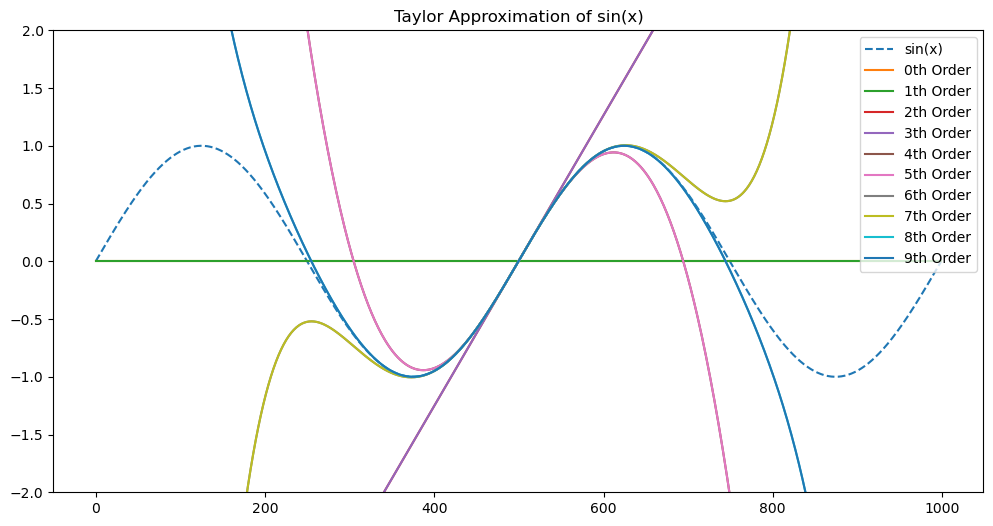

In [70]:
a: int = 0
x: np.ndarray = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

plt.figure(figsize=(12, 6))
plt.plot(np.sin(x), label="sin(x)", linestyle="--")

for order in sin.derivatives.keys():
    plt.plot(
        calculate_taylor_appriximation(x=x, a=a, order=order, func=sin), 
        label=f"{order}th Order"
    )

plt.legend()
plt.ylim(bottom=-2, top=2)
plt.title("Taylor Approximation of sin(x)")